# Patent analysis on Powertrain technologies
Data collected on multiple powertrain technologies such as electric vehicle, hybrid electric vehicle, fuel cells vehicles and internal combusion engine(traditional vehicles) patent. We have made a text analysis on these technologies and performed topic modeling.

# 1) Importing key modules

In [1]:
# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Visualization 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import nltk
import pandas as pd

# 2) Loading data

In [4]:
assignments = pd.read_csv('patent_ev.csv')

In [5]:
assignments.head()

,appln,appln_id,family_id,sets,direct,granted,earliest_appln,earliest_filing_date,publn_date,publn,...,num_citing_publn,citing_publn_date,citing_publn,citing_appln,citing_appln_id,citing_family_id,num_citing_family,earliest_applt,current_applt,appln_title
0,DE69118393A,14285742,1239277,2,0,0,WO9105114W,1991-08-07,1996-05-02,DE69118393D1,...,0,NaN,NaN,NaN,NaN,NaN,30,"ELECTRIC FUEL (E.F.L.) LTD., JERUSALEM, IL","ELECTRIC FUEL (E.F.L.) LTD., JERUSALEM, IL",ELEKTRISCHES ENERGIESYSTEM
1,DE69118393T,14285743,1239277,2,0,1,WO9105114W,1991-08-07,1996-09-05,DE69118393T2,...,2,2016-02-25\n2018-05-22,DE102014216372A1\nUS9975438B2,DE102014216372A\nUS201715436024A,449479509\n479351260,53836089\n53836089,30,"ELECTRIC FUEL (E.F.L.) LTD., JERUSALEM, IL","ELECTRIC FUEL (E.F.L.) LTD., JERUSALEM, IL",ELEKTRISCHES ENERGIESYSTEM
2,EP91915464A,16916549,1239277,2,0,1,WO9105114W,1991-08-07,1993-09-01\n1994-03-09\n1996-03-27,EP0557287A1\nEP0557287A4\nEP0557287B1,...,1,2007-12-25,US7313469B2,US51676105A,51497271,29718835,30,ELECTRIC FUEL (E.F.L.) LTD.,ELECTRIC FUEL (E.F.L.) LTD.,ELECTRICAL ENERGY SYSTEM
3,WO9105114W,47158713,1239277,2,1,1,US55592190A,1990-07-19,1993-02-18,WO9303532A1,...,1,2002-07-11,WO0199222A3,WO0119827W,45621927,24395918,30,LUZ ELECTRIC FUEL ISRAEL LTD.,LUZ ELECTRIC FUEL ISRAEL LTD.,ELECTRICAL ENERGY SYSTEM
4,US55592190A,51797454,1239277,2,1,1,US55592190A,1990-07-19,1992-06-09,US5121044A,...,44,1993-05-04\n1994-03-09\n1994-09-20\n1995-07-18...,US5208526A\nEP0557287A4\nUS5349535A\nUS5434020...,US63645090A\nEP91915464A\nUS96399792A\nUS15296...,52393850\n16916549\n54353461\n48212422\n457802...,27071024\n1239277\n25508001\n22545199\n2636904...,30,"Luz Electric Fuel Israel, Ltd.","Luz Electric Fuel Israel, Ltd.",Electrical energy system


In [6]:
assignments['granted'].value_counts()

1    16981
0     6851
Name: granted, dtype: int64

1    16981
0     6851
Name: granted, dtype: int64


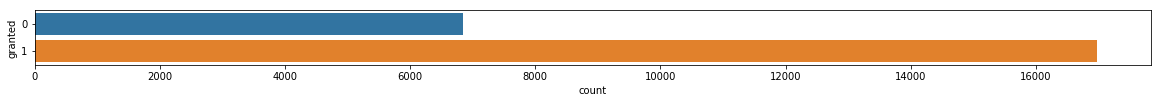

In [7]:
fig = plt.figure(figsize=(20,1))
sns.countplot(y='granted', data=assignments);
print(assignments.granted.value_counts())

In [8]:
assignments.shape

(23832, 32)

In [9]:
patent=assignments['appln_title']

In [10]:
patent[:3]

0    ELEKTRISCHES ENERGIESYSTEM
1    ELEKTRISCHES ENERGIESYSTEM
2      ELECTRICAL ENERGY SYSTEM
Name: appln_title, dtype: object

**Need full abstract or atleast full title of given patent**

## a) Types of features in our dataset

In [11]:
assignments.dtypes.value_counts()

object    21
int64     11
dtype: int64

In [12]:
# Checking all variables with their data-type
def _tbl_dtype(dataset):
    sum_dtype = pd.DataFrame(dataset.dtypes).sort_values(0).rename(columns = {0:'Data Type'})
    return sum_dtype

table_dtype = _tbl_dtype(assignments)
table_dtype

,Data Type
num_cited_publn,int64
appln_id,int64
family_id,int64
sets,int64
direct,int64
granted,int64
num_cited_family,int64
num_citing_family,int64
num_citing_publn,int64
num_ipc_class,int64


## b) Checking missing values

In [13]:
def find_missing_values(df, columns):
    """
    Finds number of rows where certain columns are missing values.
    ::param_df:: = target dataframe
    ::param_columns:: = list of columns
    """
    missing_vals = {}
    print("Number of missing or NaN values for each column:")
    df_length = len(df)
    for column in columns:
        total_column_values = df[column].value_counts().sum()
        missing_vals[column] = df_length-total_column_values
        #missing_vals.append(str(column)+ " column has {} missing or NaN values.".format())
    return missing_vals

In [14]:
missing_values = find_missing_values(assignments, columns=assignments.columns)
missing_values

Number of missing or NaN values for each column:


{'appln': 0,
 'appln_id': 0,
 'family_id': 0,
 'sets': 0,
 'direct': 0,
 'granted': 0,
 'earliest_appln': 0,
 'earliest_filing_date': 0,
 'publn_date': 0,
 'publn': 0,
 'publn_first_grant': 0,
 'num_cpc_class': 0,
 'cpc_class': 1624,
 'num_ipc_class': 0,
 'ipc_class': 85,
 'num_cited_publn': 0,
 'cited_publn_date': 9456,
 'cited_publn': 9456,
 'cited_appln': 9456,
 'cited_appln_id': 9456,
 'cited_family_id': 9456,
 'num_cited_family': 0,
 'num_citing_publn': 0,
 'citing_publn_date': 10499,
 'citing_publn': 10499,
 'citing_appln': 10499,
 'citing_appln_id': 10499,
 'citing_family_id': 10499,
 'num_citing_family': 0,
 'earliest_applt': 843,
 'current_applt': 843,
 'appln_title': 0}

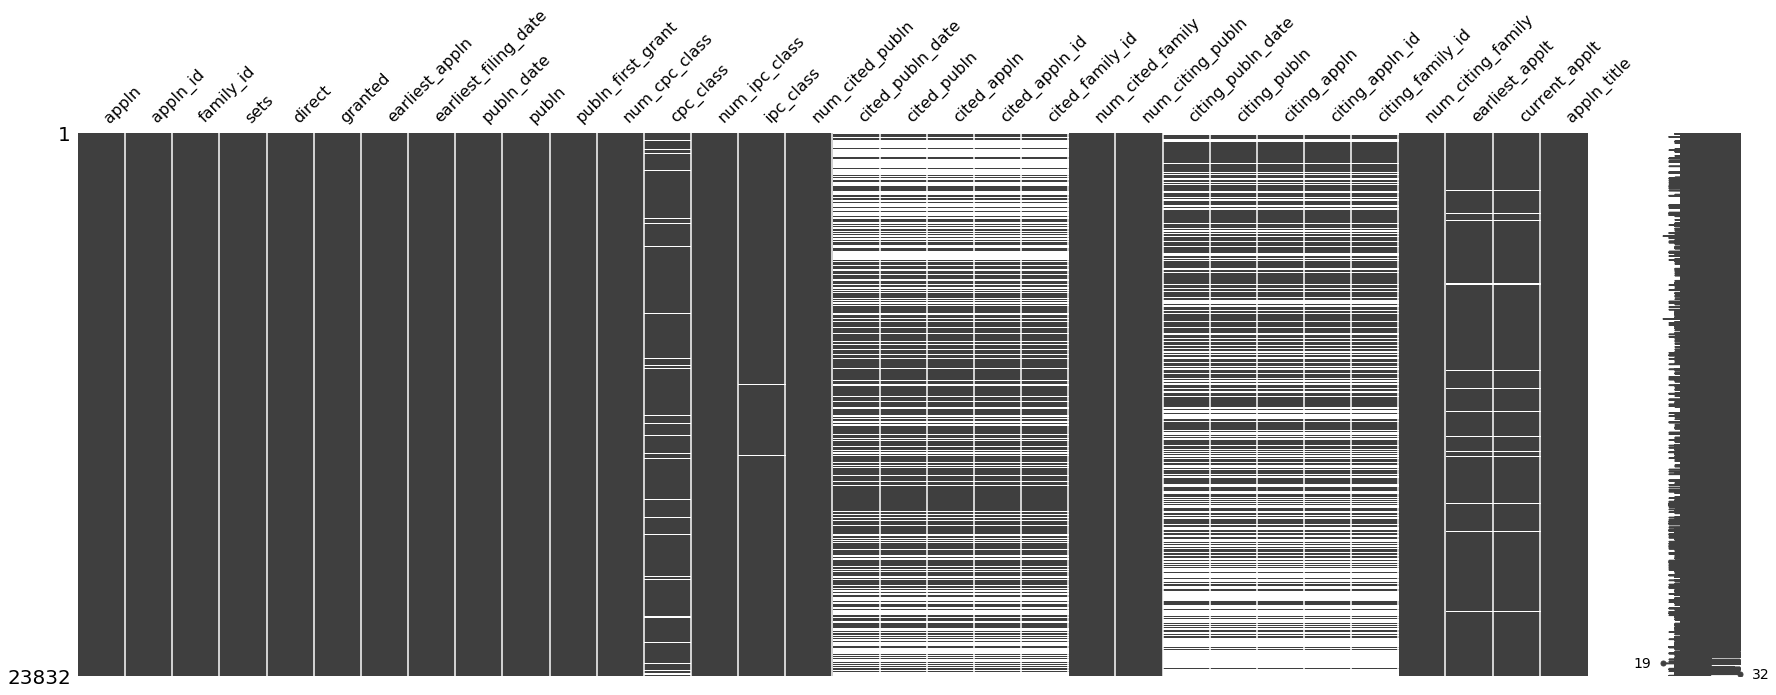

In [15]:
import missingno
missingno.matrix(assignments, figsize = (30,10))

In [16]:
def summary_missing(dataset):
    n_miss = dataset.isnull().sum()
    n_obs = dataset.shape[0]
    n_miss_per = n_miss/n_obs*100
    n_miss_tbl = pd.concat([n_miss, n_miss_per], axis = 1).sort_values(1, ascending = False).round(1)
    n_miss_tbl = n_miss_tbl[n_miss_tbl[1] != 0]
    print('No. of fields: ', dataset.shape[0])
    print('No. of missing fields: ', n_miss_tbl.shape[0])
    n_miss_tbl = n_miss_tbl.rename(columns = {0:'No. of mising Value', 1:'%age of missing Value'})
    return n_miss_tbl

summary_missing(assignments)

No. of fields:  23832
No. of missing fields:  14


,No. of mising Value,%age of missing Value
citing_publn,10499,44.1
citing_publn_date,10499,44.1
citing_family_id,10499,44.1
citing_appln_id,10499,44.1
citing_appln,10499,44.1
cited_publn,9456,39.7
cited_appln_id,9456,39.7
cited_family_id,9456,39.7
cited_publn_date,9456,39.7
cited_appln,9456,39.7


## c) Checking data for text analysis

In [17]:
chars = list(set(patent)) 
data_size, vocab_size = len(patent), len(chars)
print ("Patent data has chars", data_size)
print ("Patent data has unique chars", vocab_size)

Patent data has chars 23832
Patent data has unique chars 16419


**We do not have have a higher difference in unique words and total chars. That's why we need abstract or atleast full title**

### Creating a dataframe for data exploring


In [18]:
data_text = assignments[['appln_title']]

In [19]:
type(data_text)

pandas.core.frame.DataFrame

In [20]:
data_text[:5]

,appln_title
0,ELEKTRISCHES ENERGIESYSTEM
1,ELEKTRISCHES ENERGIESYSTEM
2,ELECTRICAL ENERGY SYSTEM
3,ELECTRICAL ENERGY SYSTEM
4,Electrical energy system


In [21]:
data_text['index'] = data_text.index
documents = data_text

In [22]:
documents.head()

,appln_title,index
0,ELEKTRISCHES ENERGIESYSTEM,0
1,ELEKTRISCHES ENERGIESYSTEM,1
2,ELECTRICAL ENERGY SYSTEM,2
3,ELECTRICAL ENERGY SYSTEM,3
4,Electrical energy system,4


In [23]:
print(len(documents))

23832


In [24]:
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim')

import nltk
import gensim

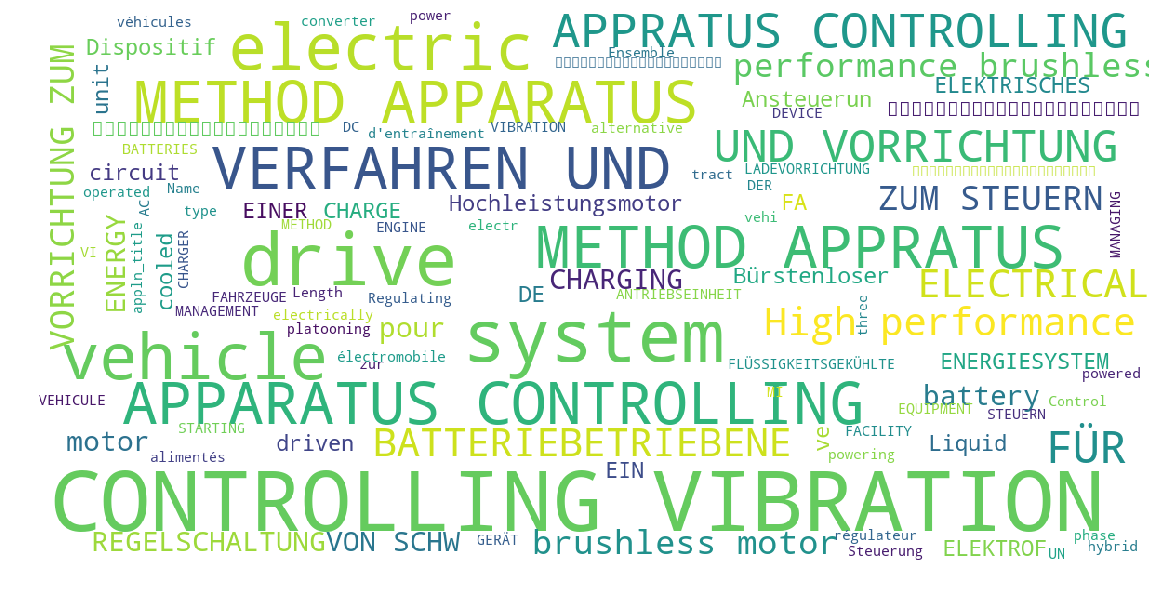

In [25]:
from wordcloud import WordCloud, STOPWORDS
stopwords=set(STOPWORDS)

def Mywordcloud (data, title=None):
    wordcloud=WordCloud(
    background_color='white',
    stopwords=stopwords,
    max_words= 100 ,
    max_font_size=40 ,
    scale=3,
    random_state=1
    ).generate(str(data))
    
    fig=plt.figure(1 , figsize(20, 20))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    
    plt.imshow(wordcloud)
    plt.show()
Mywordcloud(documents['appln_title'].dropna())

# 3) Cleaning and Preprocessing

- Tokenization: Split the text into sentences and the sentences into words. Lowercase the words and remove punctuation.
- Words that have fewer than 3 characters are removed.
- All stopwords are removed.
- Words are lemmatized — words in third person are changed to first person and verbs in past and future tenses are changed into present.
- Words are stemmed — words are reduced to their root form.

In [26]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2019)

In [27]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Hassan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [28]:
# Example
print(WordNetLemmatizer().lemmatize('knew', pos='v'))

know


In [29]:
# Example
print(WordNetLemmatizer().lemmatize('went', pos='v'))

go


In [30]:
#Example of stemmer
stemmer = SnowballStemmer('english')
original_words = ['worked', 'flies', 'dies', 'mules', 'denied','died', 'agreed', 'owned', 
           'humbled', 'sized','meeting', 'stating', 'siezing', 'itemization','sensational', 
           'traditional', 'reference', 'colonizer','plotted']
singles = [stemmer.stem(plural) for plural in original_words]
pd.DataFrame(data = {'original word': original_words, 'stemmed': singles})

,original word,stemmed
0,worked,work
1,flies,fli
2,dies,die
3,mules,mule
4,denied,deni
5,died,die
6,agreed,agre
7,owned,own
8,humbled,humbl
9,sized,size


In [31]:
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [32]:
doc_sample = documents[documents['index'] == 500].values[0][0]

print('original document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))

original document: 
['BATTERY', 'CHARGE', 'CONTROLLER', 'FOR', 'ELECTRIC', 'VEHICLE']


 tokenized and lemmatized document: 
['batteri', 'charg', 'control', 'electr', 'vehicl']


In [33]:
processed_docs = documents['appln_title'].map(preprocess)

In [34]:
processed_docs[:10]

0                          [elektrisch, energiesystem]
1                          [elektrisch, energiesystem]
2                                     [electr, energi]
3                                     [electr, energi]
4                                     [electr, energi]
5                           [regelschaltung, fahrzeug]
6      [regul, circuit, batteri, oper, electr, vehicl]
7    [dispositif, régulateur, pour, véhicul, alimen...
8                      [antriebseinheit, elektromobil]
9          [liquid, cool, drive, unit, electr, vehicl]
Name: appln_title, dtype: object

In [35]:
df = pd.DataFrame({'Patent_titles':processed_docs})
df.head()

,Patent_titles
0,"[elektrisch, energiesystem]"
1,"[elektrisch, energiesystem]"
2,"[electr, energi]"
3,"[electr, energi]"
4,"[electr, energi]"


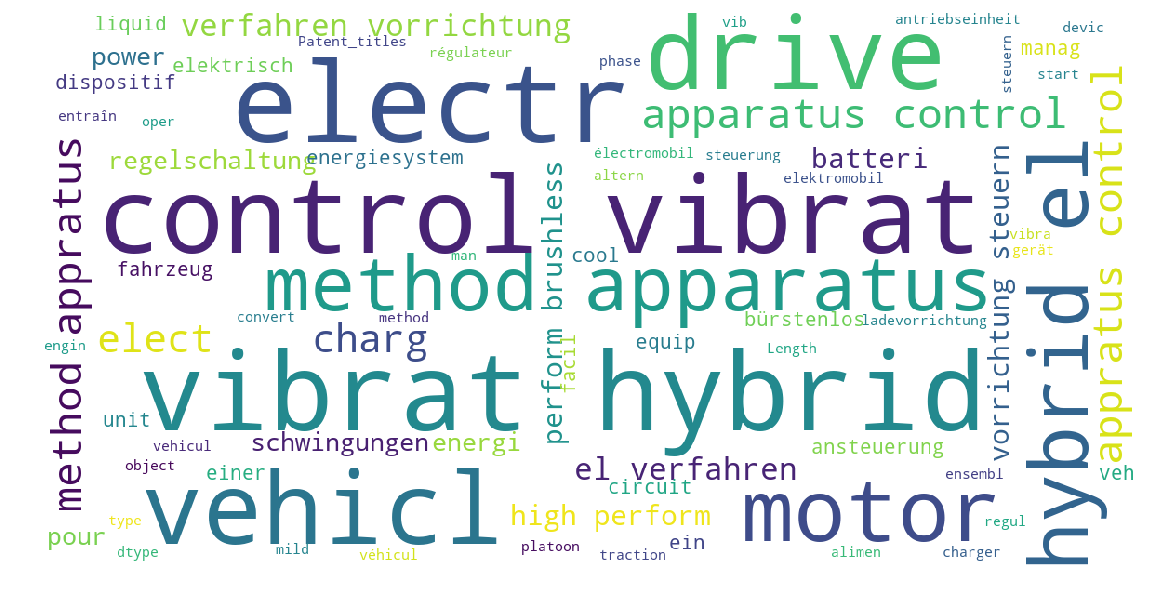

In [36]:
stopwords=set(STOPWORDS)

def Mywordcloud (data, title=None):
    wordcloud=WordCloud(
    background_color='white',
    stopwords=stopwords,
    max_words= 100 ,
    max_font_size=40 ,
    scale=3,
    random_state=1
    ).generate(str(data))
    
    fig=plt.figure(1 , figsize(20, 20))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    
    plt.imshow(wordcloud)
    plt.show()
Mywordcloud(df["Patent_titles"].dropna())

# 4) Bag of words

In [37]:
dictionary = gensim.corpora.Dictionary(processed_docs)

In [38]:
print(len(dictionary))

4857


In [39]:
count = 0
for k, v in dictionary.iteritems():
    print(k, v, dictionary.dfs[k])
    count += 1
    if count > 10:
        break

0 elektrisch 291
1 energiesystem 2
2 electr 16005
3 energi 1092
4 fahrzeug 326
5 regelschaltung 3
6 batteri 3216
7 circuit 369
8 oper 559
9 regul 80
10 vehicl 14538


Filter out tokens that appear in
- less than 15 documents (absolute number) or
- more than 0.5 documents (fraction of total corpus size, not absolute number).
- after the above two steps, keep only the first 4000 most frequent tokens.As dictionary size is 4857

In [40]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=4000)

In [41]:
print (dictionary[3],dictionary[14],dictionary[15],dictionary[500])

batteri control charg ratio


In [42]:
print(len(dictionary))

608


**Dictionary contains words. All of our data word.**

In [43]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[500]

[(3, 1), (14, 1), (15, 1)]

In [44]:
bow_doc_500 = bow_corpus[500]

for i in range(len(bow_doc_500)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_500[i][0], 
                                                     dictionary[bow_doc_500[i][0]], 
                                                     bow_doc_500[i][1]))

Word 3 ("batteri") appears 1 time.
Word 14 ("control") appears 1 time.
Word 15 ("charg") appears 1 time.


# 5 )TF-IDF

In [45]:
from gensim import corpora, models

tfidf = models.TfidfModel(bow_corpus)

In [46]:
corpus_tfidf = tfidf[bow_corpus]

In [47]:
from pprint import pprint

for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 1.0)]


# 6) LDA model

# i-Running LDA using Bag of Words

In [48]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)

In [49]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.086*"charg" + 0.048*"method" + 0.042*"energi" + 0.042*"batteri" + 0.038*"control" + 0.036*"current" + 0.030*"monitor" + 0.022*"power" + 0.022*"brake" + 0.021*"park"
Topic: 1 
Words: 0.209*"control" + 0.148*"method" + 0.130*"hybrid" + 0.103*"devic" + 0.041*"drive" + 0.029*"thereof" + 0.029*"apparatus" + 0.019*"engin" + 0.015*"start" + 0.014*"oper"
Topic: 2 
Words: 0.090*"batteri" + 0.041*"storag" + 0.036*"power" + 0.035*"devic" + 0.029*"pack" + 0.028*"hybrid" + 0.026*"modul" + 0.022*"electron" + 0.020*"drive" + 0.020*"control"
Topic: 3 
Words: 0.197*"batteri" + 0.058*"structur" + 0.030*"mount" + 0.029*"pack" + 0.028*"devic" + 0.027*"charg" + 0.026*"method" + 0.025*"assembl" + 0.024*"elektrisch" + 0.021*"fahrzeug"
Topic: 4 
Words: 0.075*"charg" + 0.060*"devic" + 0.056*"batteri" + 0.037*"verfahren" + 0.037*"ein" + 0.030*"automobil" + 0.030*"high" + 0.026*"protect" + 0.025*"method" + 0.024*"power"
Topic: 5 
Words: 0.218*"control" + 0.117*"method" + 0.087*"motor" + 0.060*

# ii-Running LDA using TF-IDF

In [50]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary, passes=2, workers=4)

In [51]:
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.114*"charg" + 0.051*"batteri" + 0.040*"method" + 0.035*"devic" + 0.034*"control" + 0.032*"pack" + 0.027*"discharg" + 0.024*"power" + 0.021*"hybrid" + 0.014*"transmiss"
Topic: 1 Word: 0.037*"cool" + 0.034*"convert" + 0.029*"rang" + 0.027*"extend" + 0.026*"power" + 0.026*"type" + 0.025*"method" + 0.023*"charg" + 0.022*"plug" + 0.021*"apparatus"
Topic: 2 Word: 0.054*"automobil" + 0.053*"apparatus" + 0.048*"charg" + 0.043*"charger" + 0.033*"control" + 0.031*"method" + 0.029*"batteri" + 0.027*"devic" + 0.027*"storag" + 0.025*"power"
Topic: 3 Word: 0.181*"control" + 0.095*"hybrid" + 0.087*"devic" + 0.061*"method" + 0.040*"drive" + 0.028*"power" + 0.019*"automobil" + 0.018*"generat" + 0.016*"equip" + 0.014*"apparatus"
Topic: 4 Word: 0.085*"power" + 0.076*"suppli" + 0.073*"motor" + 0.039*"control" + 0.038*"hybrid" + 0.028*"devic" + 0.028*"drive" + 0.022*"automobil" + 0.021*"method" + 0.020*"pile"
Topic: 5 Word: 0.079*"drive" + 0.043*"connector" + 0.041*"apparatus" + 0.038*"cha

# 7) Testing - Classification of the topics
Performance evaluation by classifying sample document using LDA Bag of Words model

In [52]:
print(processed_docs[500])

['batteri', 'charg', 'control', 'electr', 'vehicl']


In [53]:
for index, score in sorted(lda_model[bow_corpus[500]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))


Score: 0.44941216707229614	 
Topic: 0.218*"control" + 0.117*"method" + 0.087*"motor" + 0.060*"apparatus" + 0.054*"charg" + 0.052*"drive" + 0.035*"devic" + 0.019*"thereof" + 0.019*"hybrid" + 0.014*"torqu"

Score: 0.35053470730781555	 
Topic: 0.197*"batteri" + 0.058*"structur" + 0.030*"mount" + 0.029*"pack" + 0.028*"devic" + 0.027*"charg" + 0.026*"method" + 0.025*"assembl" + 0.024*"elektrisch" + 0.021*"fahrzeug"

Score: 0.025018133223056793	 
Topic: 0.209*"charg" + 0.116*"method" + 0.039*"batteri" + 0.039*"apparatus" + 0.039*"station" + 0.029*"devic" + 0.023*"energi" + 0.022*"rang" + 0.018*"state" + 0.018*"extend"

Score: 0.025009194388985634	 
Topic: 0.086*"charg" + 0.048*"method" + 0.042*"energi" + 0.042*"batteri" + 0.038*"control" + 0.036*"current" + 0.030*"monitor" + 0.022*"power" + 0.022*"brake" + 0.021*"park"

Score: 0.025008056312799454	 
Topic: 0.075*"charg" + 0.060*"devic" + 0.056*"batteri" + 0.037*"verfahren" + 0.037*"ein" + 0.030*"automobil" + 0.030*"high" + 0.026*"protect" +

**Our test document has the highest probability to be part of the topic on the top**

## b) Performance evaluation by classifying sample document using LDA TF-IDF model

In [54]:
for index, score in sorted(lda_model_tfidf[bow_corpus[500]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 10)))


Score: 0.77494877576828	 
Topic: 0.114*"charg" + 0.051*"batteri" + 0.040*"method" + 0.035*"devic" + 0.034*"control" + 0.032*"pack" + 0.027*"discharg" + 0.024*"power" + 0.021*"hybrid" + 0.014*"transmiss"

Score: 0.025015972554683685	 
Topic: 0.181*"control" + 0.095*"hybrid" + 0.087*"devic" + 0.061*"method" + 0.040*"drive" + 0.028*"power" + 0.019*"automobil" + 0.018*"generat" + 0.016*"equip" + 0.014*"apparatus"

Score: 0.02500561997294426	 
Topic: 0.054*"automobil" + 0.053*"apparatus" + 0.048*"charg" + 0.043*"charger" + 0.033*"control" + 0.031*"method" + 0.029*"batteri" + 0.027*"devic" + 0.027*"storag" + 0.025*"power"

Score: 0.025004969909787178	 
Topic: 0.053*"manag" + 0.036*"method" + 0.036*"batteri" + 0.030*"elektrofahrzeug" + 0.029*"control" + 0.028*"thereof" + 0.027*"verfahren" + 0.023*"oper" + 0.023*"ein" + 0.021*"charg"

Score: 0.025004800409078598	 
Topic: 0.045*"power" + 0.040*"control" + 0.029*"method" + 0.028*"devic" + 0.026*"convers" + 0.025*"charg" + 0.022*"machin" + 0.020

Our test document has the highest probability to be part of the topic on the top.

# 8) Testing model on unseen document

In [55]:
unseen_document = 'Automotive Battery and Electric Vehicle Testing'
bow_vector = dictionary.doc2bow(preprocess(unseen_document))

for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 5)))

Score: 0.5239958763122559	 Topic: 0.090*"batteri" + 0.041*"storag" + 0.036*"power" + 0.035*"devic" + 0.029*"pack"
Score: 0.2759804427623749	 Topic: 0.119*"manag" + 0.049*"method" + 0.049*"charger" + 0.030*"energi" + 0.024*"inform"
Score: 0.025010643526911736	 Topic: 0.197*"batteri" + 0.058*"structur" + 0.030*"mount" + 0.029*"pack" + 0.028*"devic"
Score: 0.025003952905535698	 Topic: 0.075*"charg" + 0.060*"devic" + 0.056*"batteri" + 0.037*"verfahren" + 0.037*"ein"
Score: 0.025003422051668167	 Topic: 0.116*"power" + 0.064*"drive" + 0.045*"control" + 0.040*"generat" + 0.039*"unit"
Score: 0.02500235103070736	 Topic: 0.209*"charg" + 0.116*"method" + 0.039*"batteri" + 0.039*"apparatus" + 0.039*"station"
Score: 0.025002187117934227	 Topic: 0.086*"charg" + 0.048*"method" + 0.042*"energi" + 0.042*"batteri" + 0.038*"control"
Score: 0.025000737980008125	 Topic: 0.209*"control" + 0.148*"method" + 0.130*"hybrid" + 0.103*"devic" + 0.041*"drive"
Score: 0.025000261142849922	 Topic: 0.187*"power" + 0.13

In [56]:
# For TF-IDF
unseen_document = 'Automotive Battery and Electric Vehicle Testing'
bow_vector = dictionary.doc2bow(preprocess(unseen_document))

for index, score in sorted(lda_model_tfidf[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 5)))

Score: 0.7749027609825134	 Topic: 0.187*"power" + 0.133*"automobil" + 0.081*"suppli" + 0.065*"devic" + 0.064*"charg"
Score: 0.025026025250554085	 Topic: 0.209*"control" + 0.148*"method" + 0.130*"hybrid" + 0.103*"devic" + 0.041*"drive"
Score: 0.02501653879880905	 Topic: 0.116*"power" + 0.064*"drive" + 0.045*"control" + 0.040*"generat" + 0.039*"unit"
Score: 0.02501455880701542	 Topic: 0.119*"manag" + 0.049*"method" + 0.049*"charger" + 0.030*"energi" + 0.024*"inform"
Score: 0.02501274086534977	 Topic: 0.075*"charg" + 0.060*"devic" + 0.056*"batteri" + 0.037*"verfahren" + 0.037*"ein"
Score: 0.025012725964188576	 Topic: 0.086*"charg" + 0.048*"method" + 0.042*"energi" + 0.042*"batteri" + 0.038*"control"
Score: 0.025005940347909927	 Topic: 0.218*"control" + 0.117*"method" + 0.087*"motor" + 0.060*"apparatus" + 0.054*"charg"
Score: 0.025005243718624115	 Topic: 0.209*"charg" + 0.116*"method" + 0.039*"batteri" + 0.039*"apparatus" + 0.039*"station"
Score: 0.025002162903547287	 Topic: 0.090*"batteri

In [57]:
# For LDA visuals
from __future__ import print_function
import pyLDAvis
import pyLDAvis.gensim
pyLDAvis.enable_notebook() 

In [58]:
lda_vis = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dictionary)
pyLDAvis.display(lda_vis)

In [59]:
lda_vis = pyLDAvis.gensim.prepare(lda_model_tfidf, corpus_tfidf, dictionary)
pyLDAvis.display(lda_vis)